Name: Kemal Demirel

ID: 191104091

Course: BIL470

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
display(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
display(test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Exploratory Data Analysis (EDA)

In [5]:
print("train data shape:",train.shape)
print("test data shape:",test.shape)

train data shape: (1460, 81)
test data shape: (1459, 80)


In [6]:
print (train.SalePrice.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Skew is: 1.8828757597682129


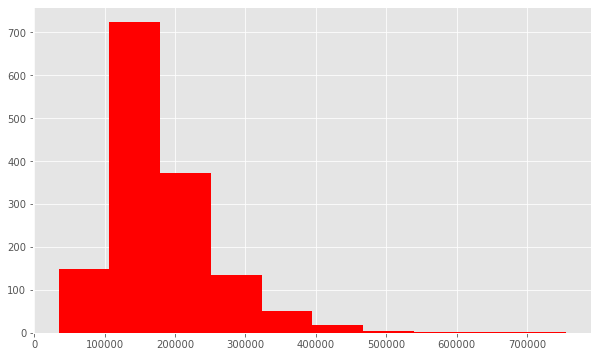

In [7]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='red')
plt.show()


 Skew is: 0.12133506220520406


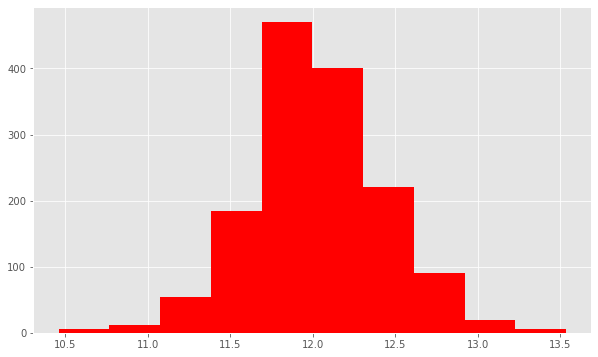

In [8]:
target = np.log(train.SalePrice)
print ("\n Skew is:", target.skew())
plt.hist(target, color='red')
plt.show()

In [9]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<AxesSubplot:>

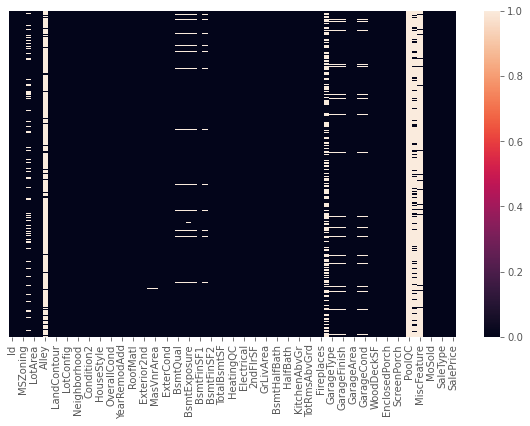

In [11]:
sns.heatmap(train.isnull(),yticklabels=False)

In [12]:
print("Types of feature")
numeric_features = train.select_dtypes(include=[np.number])
print(numeric_features.dtypes)

Types of feature
Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object


In [13]:
#train.drop(['Id'], axis=1, inplace=True)
#test.drop(['Id'], axis=1, inplace=True)

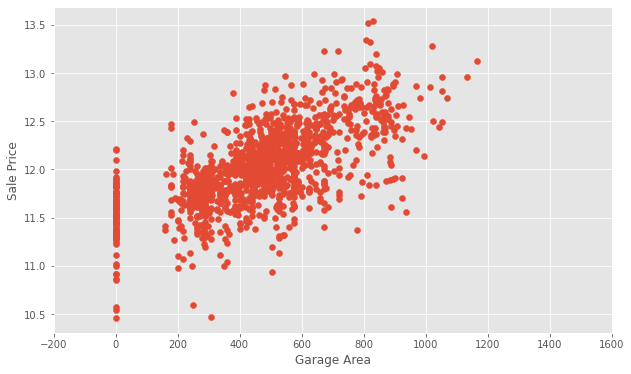

In [14]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Correlation Matrix


<AxesSubplot:>

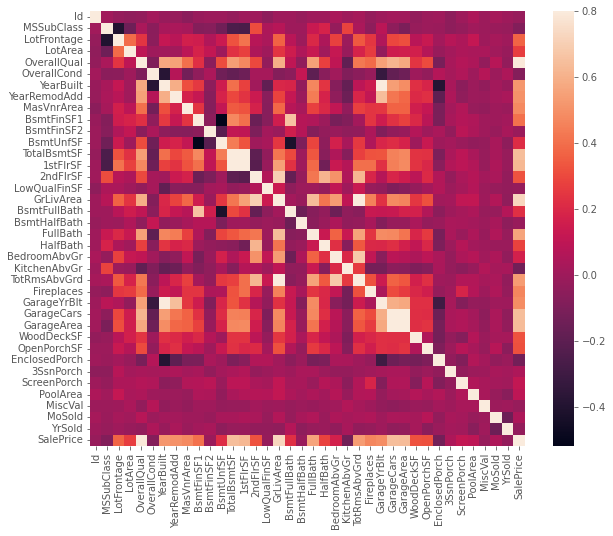

In [15]:
print("Correlation Matrix")
correlation_matrix = train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmax=.8,square=True)

Text(0.5, 0.98, 'Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)')

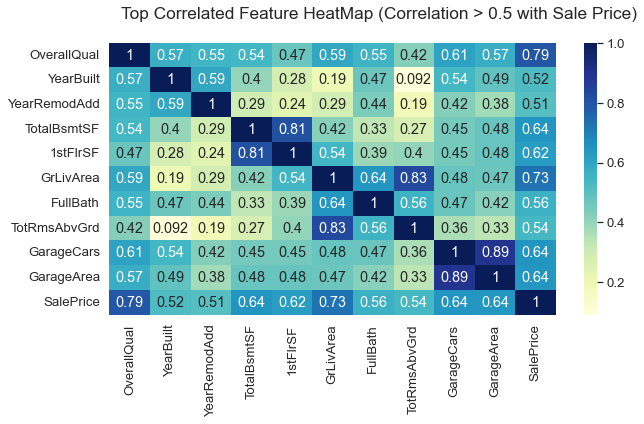

In [16]:
corr = train.corr()
sns.set(font_scale = 1.2)
plt.figure(figsize = (10,5))
top_corr = corr.index[abs(corr["SalePrice"])>0.5]
g = sns.heatmap(train[top_corr].corr(),annot=True,cmap="YlGnBu")
plt.suptitle("Top Correlated Feature HeatMap (Correlation > 0.5 with Sale Price)")

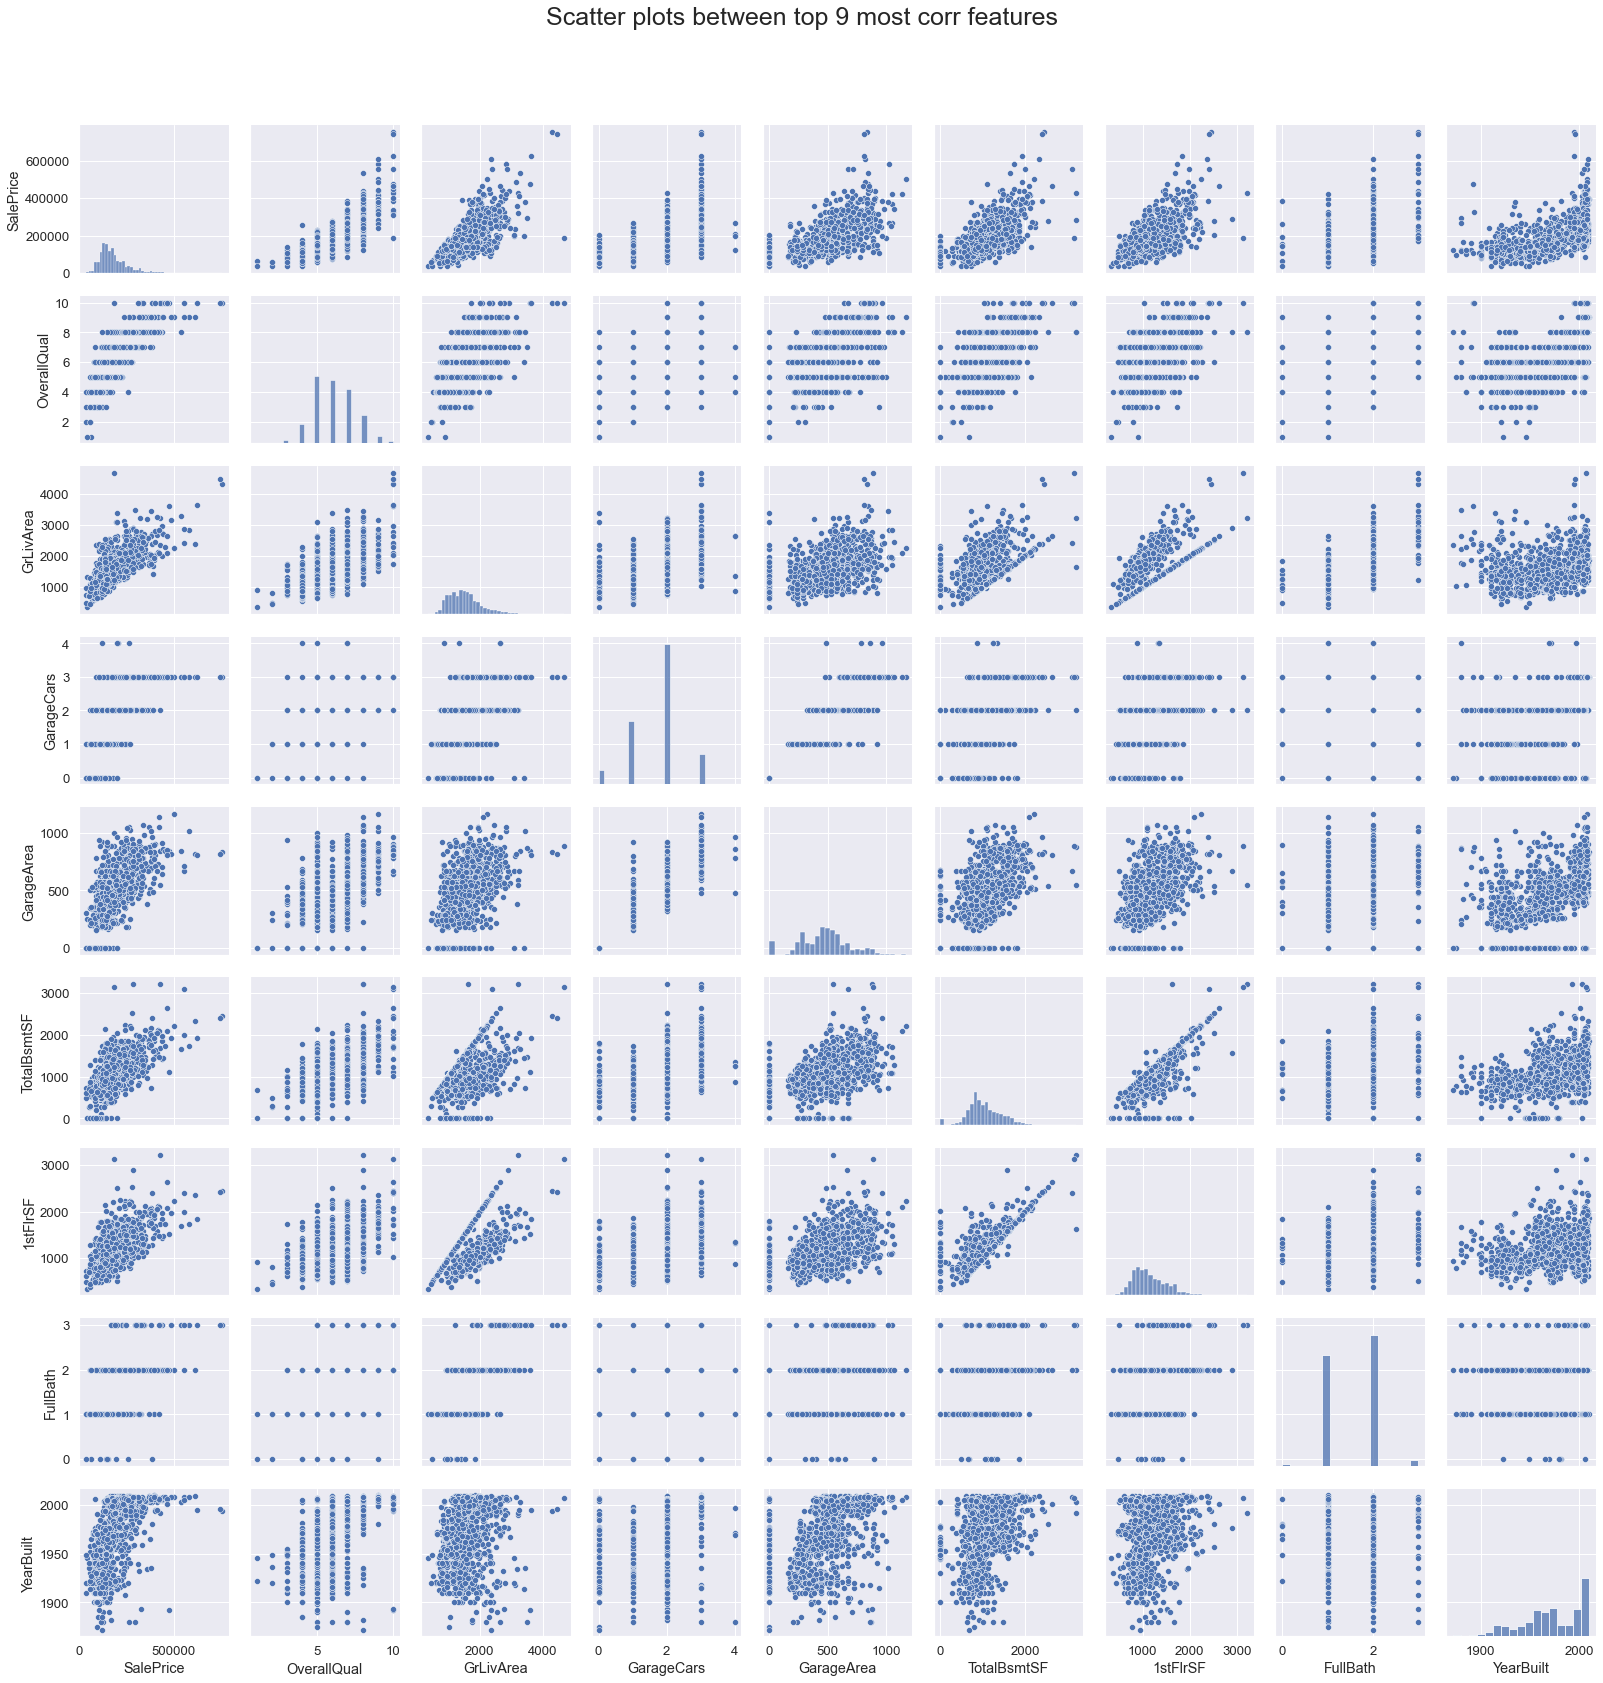

In [17]:
rcParams['figure.figsize'] = 5,5
sns_plot = sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF','1stFlrSF','FullBath','YearBuilt']])
plt.suptitle('Scatter plots between top 9 most corr features', y=1.04, size=25)
plt.tight_layout()
plt.show()

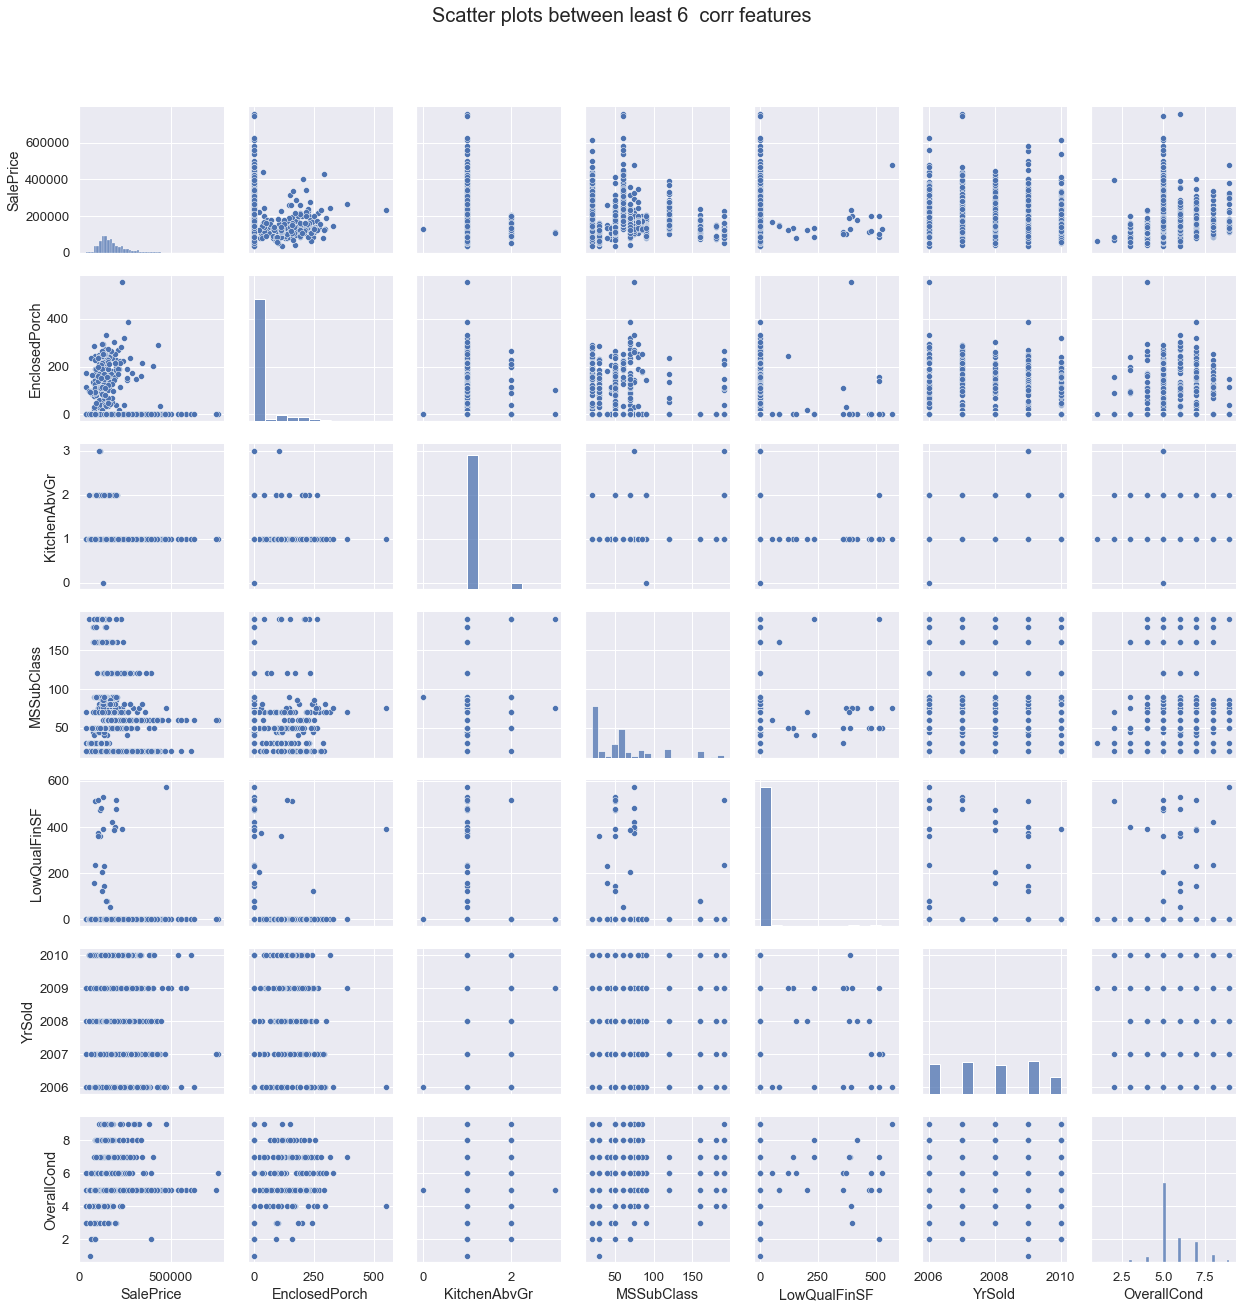

In [18]:
rcParams['figure.figsize'] = 5,5
cols = ['SalePrice','EnclosedPorch', 'KitchenAbvGr', 'MSSubClass', 'LowQualFinSF','YrSold', 'OverallCond']
sns_plot = sns.pairplot(train[cols])

plt.suptitle('Scatter plots between least 6  corr features', y=1.04, size=20)
plt.tight_layout()
plt.show()

# Data Cleaning, Feature Engineering, Filling Null Values

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1455 non-null   int64  
 5   Street         1455 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1455 non-null   object 
 8   LandContour    1455 non-null   object 
 9   Utilities      1455 non-null   object 
 10  LotConfig      1455 non-null   object 
 11  LandSlope      1455 non-null   object 
 12  Neighborhood   1455 non-null   object 
 13  Condition1     1455 non-null   object 
 14  Condition2     1455 non-null   object 
 15  BldgType       1455 non-null   object 
 16  HouseStyle     1455 non-null   object 
 17  OverallQual    1455 non-null   int64  
 18  OverallC

In [20]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1455.000000,1455.000000,1197.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1447.000000,1455.000000,...,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000,1455.000000
mean,729.601375,56.872852,69.745196,10455.472165,6.096220,5.578694,1971.224742,1984.848110,102.615066,439.364261,...,93.990378,46.513402,22.029553,3.421306,15.112715,2.438488,43.253608,6.325773,2007.815120,180823.129210
std,421.782303,42.201060,23.193156,9880.273055,1.373389,1.112867,30.193365,20.631492,179.381349,434.191781,...,125.115550,66.032252,61.210563,29.367012,55.846195,38.249185,496.785398,2.702536,1.329816,79330.167781
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,59.000000,7537.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,729.000000,50.000000,69.000000,9464.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11568.500000,7.000000,6.000000,2000.000000,2004.000000,164.500000,710.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

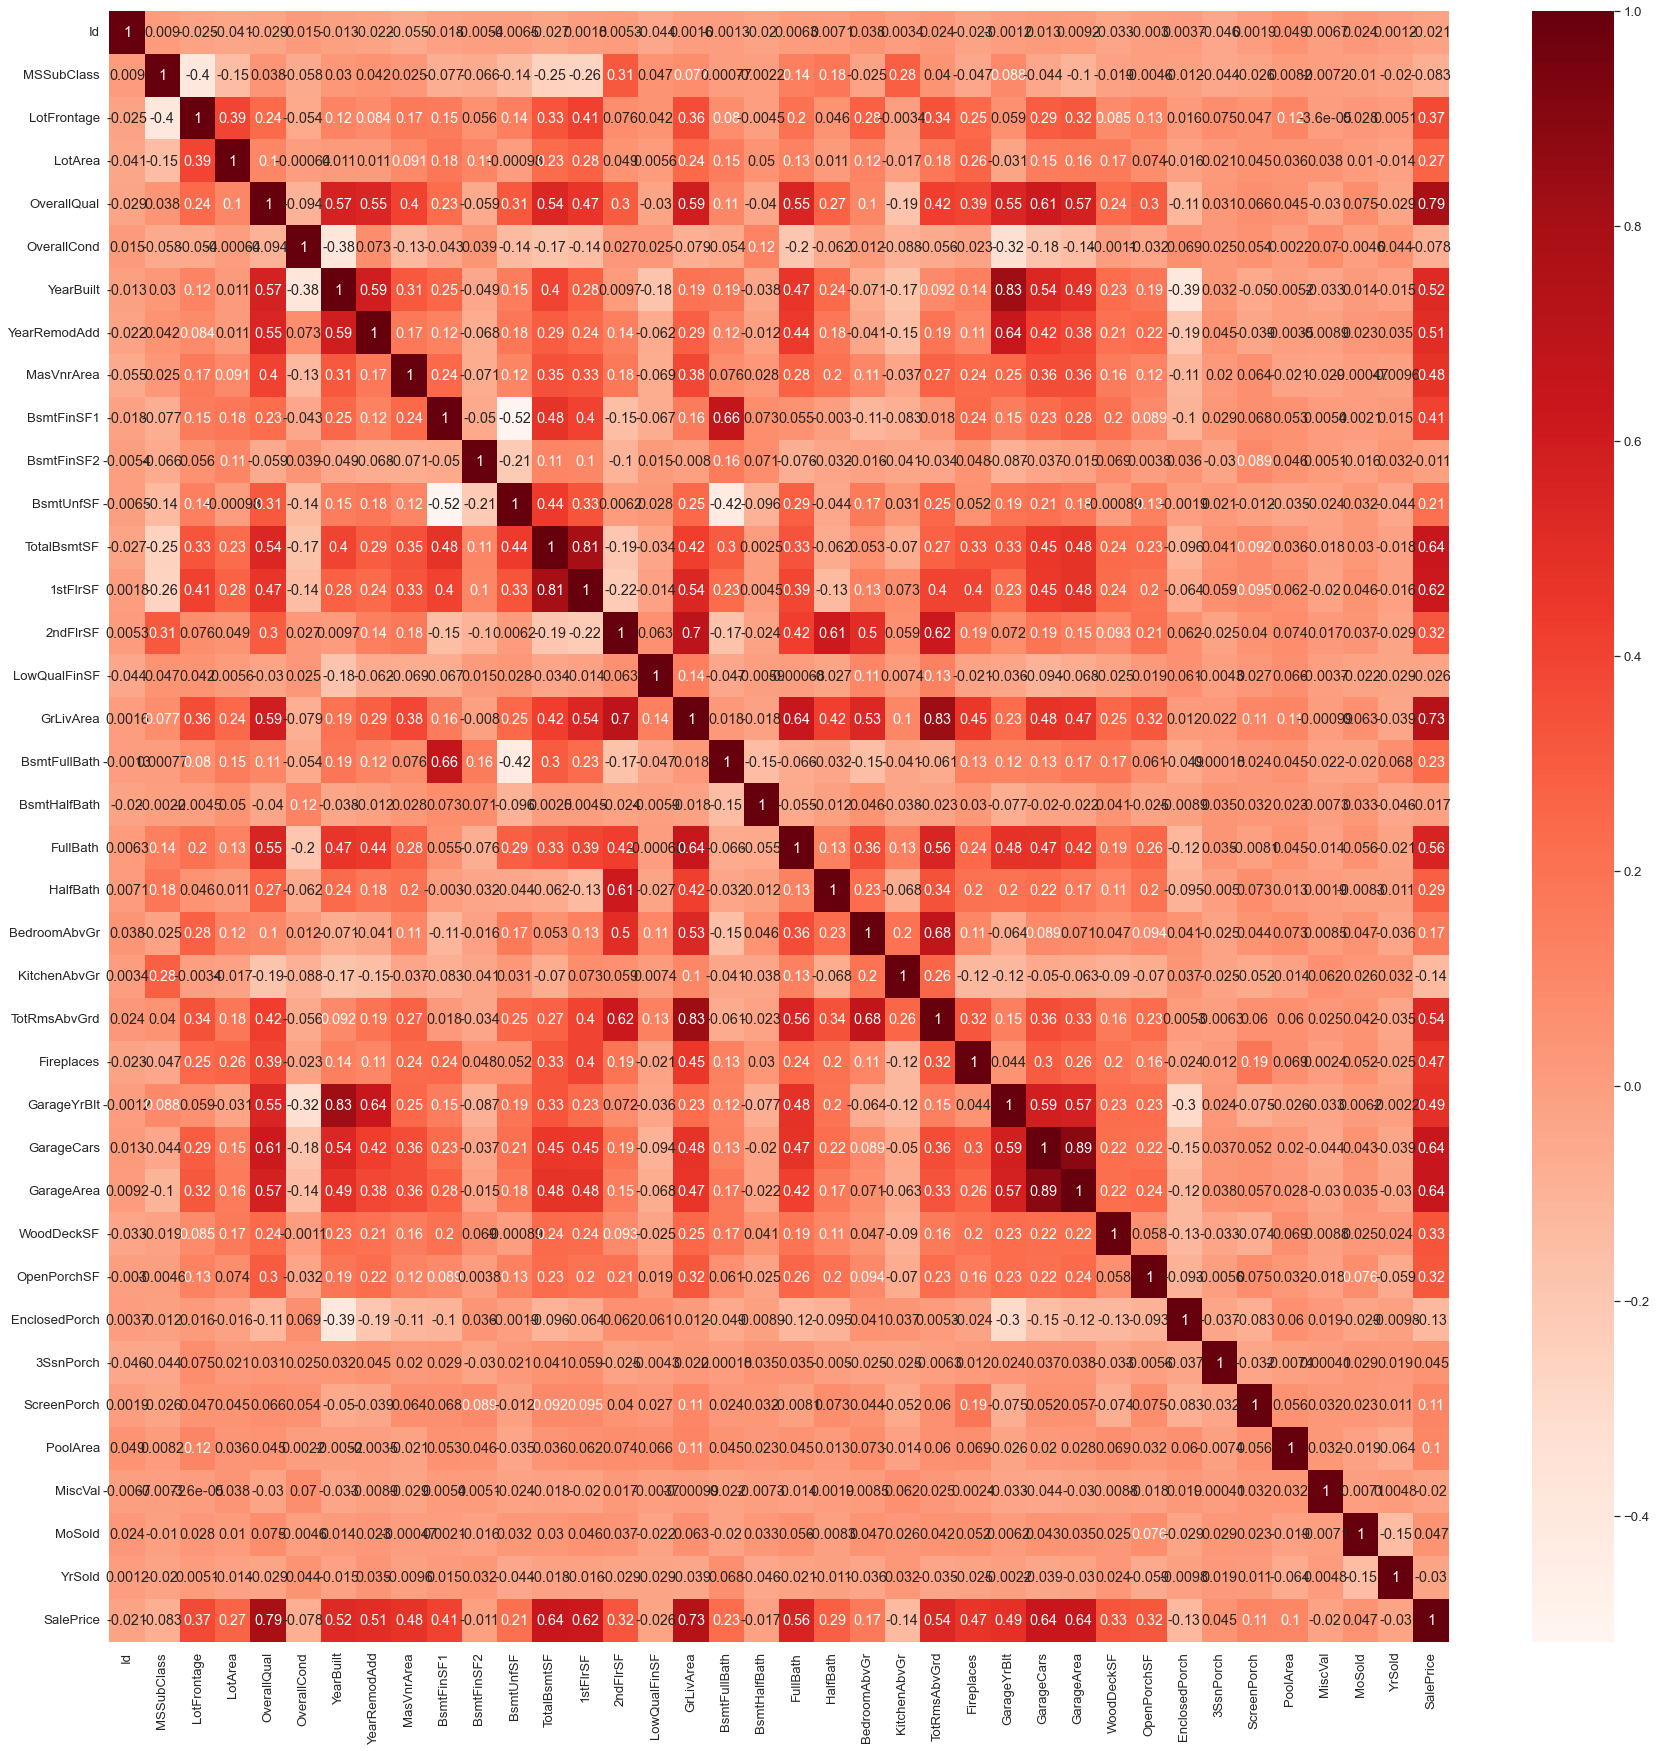

In [21]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(train.corr(), annot = True,cmap= 'Reds')

In [22]:
print("Shape of train data:",train.shape)

Shape of train data: (1455, 81)


In [23]:
selected_cols = list(train.select_dtypes(exclude ='object').columns)

coorr_list=[]

for i in selected_cols:
    if((train[i].corr(train['SalePrice']) >= 0.4) or (train[i].corr(train['SalePrice'])<= -0.4)):
         coorr_list.append([train['SalePrice'].corr(train[i]),i])

In [24]:
coorr_list

[[0.7928788075963223, 'OverallQual'],
 [0.5218875593132852, 'YearBuilt'],
 [0.5058759492320207, 'YearRemodAdd'],
 [0.4767486089011568, 'MasVnrArea'],
 [0.4051305155345639, 'BsmtFinSF1'],
 [0.6443175785504426, 'TotalBsmtSF'],
 [0.6242298142986955, '1stFlrSF'],
 [0.7251454417613792, 'GrLivArea'],
 [0.5604380806028294, 'FullBath'],
 [0.536971583379658, 'TotRmsAbvGrd'],
 [0.46940232922799846, 'Fireplaces'],
 [0.4867580582016592, 'GarageYrBlt'],
 [0.6440967165092373, 'GarageCars'],
 [0.6388071712391994, 'GarageArea'],
 [1.0, 'SalePrice']]

In [25]:
a = len(coorr_list)
b = len(coorr_list[0])

coorr_list= np.reshape(coorr_list,(a,b))
coorr_list = pd.DataFrame(coorr_list)
coorr_list=coorr_list.set_index(coorr_list[0])
coorr_list=coorr_list.iloc[:, 1]
coorr_list=coorr_list.sort_index(ascending=False)

In [26]:
print(coorr_list)

0
1.0                       SalePrice
0.7928788075963223      OverallQual
0.7251454417613792        GrLivArea
0.6443175785504426      TotalBsmtSF
0.6440967165092373       GarageCars
0.6388071712391994       GarageArea
0.6242298142986955         1stFlrSF
0.5604380806028294         FullBath
0.536971583379658      TotRmsAbvGrd
0.5218875593132852        YearBuilt
0.5058759492320207     YearRemodAdd
0.4867580582016592      GarageYrBlt
0.4767486089011568       MasVnrArea
0.46940232922799846      Fireplaces
0.4051305155345639       BsmtFinSF1
Name: 1, dtype: object


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


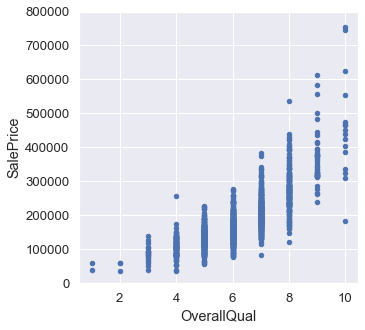

In [27]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [28]:
Nulls=train.isnull().sum()

Choose Null Columns that Are Larger Than 0.15%. Filling them

In [29]:
Nulls = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
print(missing_data[:40])
missing_data=missing_data[missing_data['Nulls']>=100]

               Nulls   Percent
PoolQC          1449  0.995876
MiscFeature     1402  0.963574
Alley           1364  0.937457
Fence           1174  0.806873
FireplaceQu      689  0.473540
LotFrontage      258  0.177320
GarageYrBlt       81  0.055670
GarageCond        81  0.055670
GarageType        81  0.055670
GarageFinish      81  0.055670
GarageQual        81  0.055670
BsmtFinType2      38  0.026117
BsmtExposure      38  0.026117
BsmtQual          37  0.025430
BsmtCond          37  0.025430
BsmtFinType1      37  0.025430
MasVnrArea         8  0.005498
MasVnrType         8  0.005498
Electrical         1  0.000687
Id                 0  0.000000
Functional         0  0.000000
Fireplaces         0  0.000000
KitchenQual        0  0.000000
KitchenAbvGr       0  0.000000
BedroomAbvGr       0  0.000000
HalfBath           0  0.000000
FullBath           0  0.000000
BsmtHalfBath       0  0.000000
TotRmsAbvGrd       0  0.000000
GarageCars         0  0.000000
GrLivArea          0  0.000000
GarageAr

In [30]:
train = train.drop((missing_data).index,1)
Nul=train.isnull().sum().sort_values(ascending=False)
print(Nul[:20])

GarageType      81
GarageCond      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
PavedDrive       0
WoodDeckSF       0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
dtype: int64


In [31]:
train.shape

(1455, 75)

In [32]:
encode_columns = list(train.select_dtypes(['object']).columns)

data = train
cols = encode_columns

enc_col = {}

In [33]:
for column in cols:
    temp = LabelEncoder().fit(data[column])
    data[column] = temp.transform(data[column])
    enc_col[column] = temp
        
data2 = data
encoders = cols

In [34]:
col = list(data2.columns)

In [35]:
col=data2.columns
temp = SimpleImputer(missing_values=np.NAN, strategy='mean')
temp = temp.fit(data2)
data2 = temp.transform(data2)
data2= np.reshape(data2,(len(data2),len(data2[0])))
data2 = pd.DataFrame(data2,columns=col)

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   float64
 1   MSSubClass     1455 non-null   float64
 2   MSZoning       1455 non-null   float64
 3   LotArea        1455 non-null   float64
 4   Street         1455 non-null   float64
 5   LotShape       1455 non-null   float64
 6   LandContour    1455 non-null   float64
 7   Utilities      1455 non-null   float64
 8   LotConfig      1455 non-null   float64
 9   LandSlope      1455 non-null   float64
 10  Neighborhood   1455 non-null   float64
 11  Condition1     1455 non-null   float64
 12  Condition2     1455 non-null   float64
 13  BldgType       1455 non-null   float64
 14  HouseStyle     1455 non-null   float64
 15  OverallQual    1455 non-null   float64
 16  OverallCond    1455 non-null   float64
 17  YearBuilt      1455 non-null   float64
 18  YearRemo

Replace any columns with a poor correlation to the target because they provided incorrect leading. 

In [37]:
print('Data Shape = ',data2.shape)

Data Shape =  (1455, 75)


In [38]:
encode_columns = list(data2.columns)
Data_coorr=[]
Drop_col=[]

for i in encode_columns:
    if((data2[i].corr(data2['SalePrice']) <= 0.06) and (data2[i].corr(data2['SalePrice'])>= -0.06)):
        Drop_col.append(i)
    elif((data2[i].corr(data2['SalePrice']) >= 0.4) or (data2[i].corr(train['SalePrice'])<= -0.4)):
         Data_coorr.append([data2['SalePrice'].corr(data2[i]),i])


In [39]:
Drop_col
D=data2
x=D.loc[:,Drop_col]

In [40]:
model = PCA(n_components= 4, svd_solver='full')
model.fit(x)

data = model.transform(x)
data = pd.DataFrame(data)

data2 = pd.concat([data2, data], axis=1)
data2.drop(Drop_col, axis=1, inplace=True)

In [41]:
data2.head()

,MSSubClass,MSZoning,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SaleCondition,SalePrice,0,1,2,3
0,60.0,3.0,8450.0,3.0,4.0,5.0,2.0,0.0,5.0,7.0,...,61.0,0.0,0.0,0.0,4.0,208500.0,-28.540159,-729.163138,-48.383068,-9.368894
1,20.0,3.0,9600.0,3.0,2.0,24.0,1.0,0.0,2.0,6.0,...,0.0,0.0,0.0,0.0,4.0,181500.0,-28.560597,-728.162847,-48.381716,-9.365950
2,60.0,3.0,11250.0,0.0,4.0,5.0,2.0,0.0,5.0,7.0,...,42.0,0.0,0.0,0.0,4.0,223500.0,-28.581045,-727.162531,-48.380094,-9.366920
3,70.0,3.0,9550.0,0.0,0.0,6.0,2.0,0.0,5.0,7.0,...,35.0,272.0,0.0,0.0,0.0,140000.0,-28.601121,-726.163767,-48.376263,-9.349145
4,60.0,3.0,14260.0,0.0,2.0,15.0,2.0,0.0,5.0,8.0,...,84.0,0.0,0.0,0.0,4.0,250000.0,-28.621768,-725.162530,-48.376080,-9.360214


## Splitting Data

In [42]:
y=data2.loc[:,'SalePrice']
X=data2.drop(['SalePrice'], axis=1)

In [43]:
Nulls = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Nulls, percent], axis=1, keys=['Nulls', 'Percent'])
missing_data=missing_data[missing_data['Nulls']>=100]
test = test.drop((missing_data).index,1)

In [44]:
Nuls = test.isnull().sum().sort_values(ascending=False)
print(Nuls[:20])

GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
dtype: int64


In [45]:
cools=test.columns
encodee_columns = list(test.select_dtypes(['object']).columns)

data = test
cols = encodee_columns

enc_col = {}

for column in cols:
    temp = LabelEncoder().fit(data[column])
    data[column] = temp.transform(data[column])
    enc_col[column] = temp
    

In [46]:
data = test
cols = encoders

temp = SimpleImputer(missing_values=np.NAN, strategy='mean')
temp = temp.fit(test)

In [47]:
test = temp.transform(test)
a = len(test)
b = len(test[0])
test= np.reshape(test,(a,b))

test = pd.DataFrame(test,columns=cools)

Drop_col
D=test
x=D.loc[:,Drop_col]

In [48]:
model = PCA(n_components= 4, svd_solver='full')
model.fit(x)

data = model.transform(x)
data = pd.DataFrame(data)

test = pd.concat([test, data], axis=1)
test.drop(Drop_col, axis=1, inplace=True)

In [49]:
Nuls = test.isnull().sum().sort_values(ascending=False)

In [50]:
standart_scaler = StandardScaler()

X = standart_scaler.fit_transform(X)

xtest = standart_scaler.transform(test)

In [51]:
y=(y-y.min())/(y.std())

In [52]:
data_test = pd.read_csv('sample_submission.csv',skiprows= 0)

In [53]:
print(data_test)

temp = data_test.iloc[:,1]

print(temp.shape)

        Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]
(1459,)


In [54]:
min_temp = temp-temp.min()
std_temp = temp.std()

In [55]:
temp = (min_temp) / (std_temp)

# Models and Comparison

### Random Forest

In [56]:
model_random_forest = RandomForestRegressor(random_state=True)

In [57]:
model_random_forest.fit(X,y)

RandomForestRegressor(random_state=True)

In [58]:
model_predict_random_forest = model_random_forest.predict(xtest)

In [59]:
mse = mean_squared_error(temp, model_predict_random_forest)
print("Score is:",model_random_forest.score(X,y)," and mse:",mse)

Score is: 0.9814073679207601  and mse: 1.992296950234706


In [60]:
cvs_random_forest = cross_val_score(model_random_forest, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_random_forest))

Cross val score: 0.8684427793069733


### K-Nearest Neighbour Regression

In [61]:
model_k_nearest = KNeighborsRegressor(n_neighbors = 5,weights = 'uniform',algorithm = 'auto',leaf_size=25)

In [62]:
model_k_nearest.fit(X,y)

KNeighborsRegressor(leaf_size=25)

In [63]:
model_predict_k_nearest = model_k_nearest.predict(xtest)

In [64]:
mse = mean_squared_error(temp, model_predict_k_nearest)
print("Score is:",model_k_nearest.score(X,y)," and mse:",mse)

Score is: 0.8532260250065808  and mse: 2.060902758109903


In [65]:
cvs_k_nearest = cross_val_score(model_k_nearest, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_k_nearest))

Cross val score: 0.777174733576828


### Decision Tree

In [66]:
model_decision_tree = DecisionTreeRegressor(random_state=True)

In [67]:
model_decision_tree.fit(X,y)

DecisionTreeRegressor(random_state=True)

In [68]:
model_predict_decision_tree = model_decision_tree.predict(xtest)

In [69]:
mse = mean_squared_error(temp, model_predict_decision_tree)
print("Score is:",model_decision_tree.score(X,y)," and mse:",mse)

Score is: 1.0  and mse: 2.1377476760638854


In [70]:
cvs_decision_tree = cross_val_score(model_decision_tree, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_decision_tree))

Cross val score: 0.7470905233515143


### Linear Regression

In [71]:
model_linear_regression = LinearRegression(n_jobs=-1)

In [72]:
model_linear_regression.fit(X,y)

LinearRegression(n_jobs=-1)

In [73]:
model_predict_linear_regression = model_linear_regression.predict(xtest)

In [74]:
mse = mean_squared_error(temp, model_predict_linear_regression)
print("Score is:",model_linear_regression.score(X,y)," and mse:",mse)

Score is: 0.8765306271245227  and mse: 842.6879903623523


In [75]:
cvs_linear_regression = cross_val_score(model_linear_regression, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_linear_regression))

Cross val score: 0.8520381547852534


### Support Vector Regressor Model

In [76]:
model_support_vector = SVR()

In [77]:
model_support_vector.fit(X,y)

SVR()

In [78]:
model_predict_support_vector = model_support_vector.predict(xtest)

In [79]:
mse = mean_squared_error(temp, model_predict_support_vector)
print("Score is:",model_support_vector.score(X,y)," and mse:",mse)

Score is: 0.9096036743271216  and mse: 1.7933543309188853


In [80]:
cvs_support_vector = cross_val_score(model_support_vector, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_support_vector))

Cross val score: 0.8084490511655169


### Gradient Boosting Regressor Model

In [81]:
model_gradient_boosting = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth = 7,min_samples_leaf=7, loss='huber', random_state =42) 

In [82]:
model_gradient_boosting.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=7,
                          min_samples_leaf=7, n_estimators=200,
                          random_state=42)

In [83]:
model_predict_gradient_boosting = model_gradient_boosting.predict(xtest)

In [84]:
mse = mean_squared_error(temp, model_predict_gradient_boosting)
print("Score is:",model_gradient_boosting.score(X,y)," and mse:",mse)

Score is: 0.9850082325068775  and mse: 2.0314532135744234


In [85]:
cvs_gradient_boosting = cross_val_score(model_gradient_boosting, X, y, cv=5,n_jobs=-1)  
print("Cross val score:",np.mean(cvs_gradient_boosting))

Cross val score: 0.8732930168328583


# Cross Validation Scores

In [86]:
score_array = []

In [87]:
temp = np.mean(cvs_gradient_boosting);
score_array.append(temp)
print("Gradient Boosting Regressor Model CSV score:\n",temp,"\n")

temp = np.mean(cvs_linear_regression);
score_array.append(temp)
print("Linear Regression Model CSV score:\n",temp,"\n")

temp = np.mean(cvs_k_nearest);
score_array.append(temp)
print("K-nearest neighbour Regression Model CSV score:\n",temp,"\n")

temp = np.mean(cvs_decision_tree);
score_array.append(temp)
print("Decision Tree Model CSV score:\n",temp,"\n")

temp = np.mean(cvs_support_vector);
score_array.append(temp)
print("Support Vector Model CSV score:\n",temp,"\n")

temp = np.mean(cvs_random_forest);
score_array.append(temp)
print("Random Forest Model CSV score:\n",temp,"\n")


Gradient Boosting Regressor Model CSV score:
 0.8732930168328583 

Linear Regression Model CSV score:
 0.8520381547852534 

K-nearest neighbour Regression Model CSV score:
 0.777174733576828 

Decision Tree Model CSV score:
 0.7470905233515143 

Support Vector Model CSV score:
 0.8084490511655169 

Random Forest Model CSV score:
 0.8684427793069733 



In [88]:
highest_score_index = 0
highest_score = 0
for i in range(0,len(score_array)):
    if highest_score < score_array[i]:
        highest_score_index = i
        highest_score = score_array[i]
if highest_score_index == 0:
    print("Highest CSV score is given by Gradient Boosting Regressor Model")
    print("The score is :",highest_score)
elif highest_score_index == 1:
    print("Highest CSV score is given by Linear Regression Model")
    print("The score is :",highest_score)    
elif highest_score_index == 2:
    print("Highest CSV score is given by K-nearest neighbour Regression Model")
    print("The score is :",highest_score)    
elif highest_score_index == 3:
    print("Highest CSV score is given by Decision Tree Model")
    print("The score is :",highest_score)    
elif highest_score_index == 4:
    print("Highest CSV score is given by Support Vector Model")
    print("The score is :",highest_score)    
elif highest_score_index == 5:
    print("Highest CSV score is given by Random Forest Model")
    print("The score is :",highest_score)    
    

Highest CSV score is given by Gradient Boosting Regressor Model
The score is : 0.8732930168328583


In [89]:
Test_Data = pd.read_csv('sample_submission.csv',skiprows= 0)

if highest_score_index == 0:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_gradient_boosting}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)
elif highest_score_index == 1:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_linear_regression}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)   
elif highest_score_index == 2:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_k_nearest}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)  
elif highest_score_index == 3:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_decision_tree}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)    
elif highest_score_index == 4:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_support_vector}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)  
elif highest_score_index == 5:
    sub = {'Id': Test_Data.Id, 'SalePrice': model_predict_random_forest}
    basic_sub = pd.DataFrame(data=sub)
    basic_sub.to_csv("submission.csv", index=False)